# Exercise: Supervised learning

In this exercise, you will be given two data sets, each of which you are to use to calculate a supervised learning model.


## Task 1: Tumor Classification using K-Nearest Neighbors (KNN)
Classify tumors as **Benign** or **Malignant** based on patient characteristics using **K-Nearest Neighbors (KNN)**.

1. **Preprocessing**
   - Encode categorical variables (`Gender`, `Location`, `Histology`, etc.).
   - Scale numerical features (`Age`, `Tumor_Size`, `Tumor_Growth_Rate`).
   - Split the dataset into **training (80%)** and **testing (20%)** sets.

2. **Model Implementation**
   - Train a **K-Nearest Neighbors (KNN) classifier** to predict `Tumor_Type` (`Benign` or `Malignant`).
   - Perform **hyperparameter tuning** to find the best `k`.

3. **Model Evaluation**:
   - Plot the **confusion matrix** and **classification report**.
   - Compare accuracy for different values of `k` using a **line plot**.

Question: Based on your accuracy values, would you say that the model is suitable for making reliable classifications about benign and malignant tumors.




In [1]:
import pandas as pd

df = pd.read_csv('brain_tumor_dataset.csv')
df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Tumor_Type              object
Tumor_Size             float64
Location                object
Histology               object
Stage                   object
Symptom_1               object
Symptom_2               object
Symptom_3               object
Radiation_Treatment     object
Surgery_Performed       object
Chemotherapy            object
Survival_Rate          float64
Tumor_Growth_Rate      float64
Family_History          object
MRI_Result              object
Follow_Up_Required      object
dtype: object

In [2]:
df.head(10)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
5,6,27,Male,Malignant,3.483837,Frontal,Astrocytoma,I,Vision Issues,Vision Issues,Headache,Yes,Yes,No,83.572069,2.261380,No,Negative,Yes
6,7,72,Male,Malignant,8.026672,Occipital,Meningioma,IV,Vision Issues,Headache,Nausea,Yes,No,Yes,69.825016,2.965008,No,Negative,No
7,8,61,Male,Benign,6.319362,Occipital,Astrocytoma,I,Headache,Seizures,Nausea,Yes,Yes,No,62.775921,2.269111,No,Negative,No
8,9,50,Male,Benign,8.075229,Temporal,Medulloblastoma,IV,Vision Issues,Vision Issues,Nausea,No,Yes,Yes,44.913090,1.208336,No,Negative,Yes
9,10,54,Male,Benign,8.549382,Frontal,Meningioma,I,Seizures,Vision Issues,Vision Issues,Yes,No,No,85.087322,2.764735,Yes,Positive,Yes


In [3]:
# Pre Processing
# Encode the categorical columns, scale the numerical ones and then split the data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

categorical_cols = ['Gender', 'Tumor_Type', 'Location', 'Histology', 'Stage',
                    'Symptom_1', 'Symptom_2', 'Symptom_3',
                    'Radiation_Treatment', 'Surgery_Performed',
                    'Chemotherapy', 'Family_History', 'MRI_Result', 'Follow_Up_Required']

numerical_cols = ['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate']

label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

X = df.drop(columns=['Patient_ID', 'Tumor_Type'])
y = LabelEncoder().fit_transform(df['Tumor_Type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

neighbors = np.arange(1, 50)
train_accuracies = {}
test_accuracies = {}
best_accuracy = 0
best_k = 1  # Initialize best_k

for neighbor in neighbors:

    knn = KNeighborsClassifier(n_neighbors=neighbor)

    knn.fit(X_train, y_train)

    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

    if test_accuracies[neighbor] > best_accuracy:
        best_k = neighbor
        best_accuracy = test_accuracies[neighbor]

print("Number of Neighbors:", neighbors)
print("Train Accuracies:", train_accuracies)
print("Test Accuracies:", test_accuracies)

print(f"Best k: {best_k} with accuracy: {best_accuracy}")

# Accuracy in the test data is basically as bad as it gets, 0.5, meaning a coin toss if our model is right or wrong, as we only have 2 outcomes


Number of Neighbors: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Train Accuracies: {1: 1.0, 2: 0.7494375, 3: 0.7524375, 4: 0.6826875, 5: 0.6810625, 6: 0.6515, 7: 0.654625, 8: 0.6371875, 9: 0.6360625, 10: 0.6205625, 11: 0.62125, 12: 0.6080625, 13: 0.6106875, 14: 0.60525, 15: 0.6045625, 16: 0.59975, 17: 0.597375, 18: 0.5910625, 19: 0.593875, 20: 0.5881875, 21: 0.5896875, 22: 0.58375, 23: 0.58175, 24: 0.5790625, 25: 0.57525, 26: 0.5730625, 27: 0.572875, 28: 0.569875, 29: 0.571375, 30: 0.565375, 31: 0.5693125, 32: 0.564, 33: 0.564125, 34: 0.5619375, 35: 0.5588125, 36: 0.5625, 37: 0.5613125, 38: 0.5573125, 39: 0.556875, 40: 0.5595625, 41: 0.557625, 42: 0.5576875, 43: 0.553875, 44: 0.5545625, 45: 0.553375, 46: 0.554375, 47: 0.549875, 48: 0.552125, 49: 0.550125}
Test Accuracies: {1: 0.483, 2: 0.4895, 3: 0.48225, 4: 0.492, 5: 0.49, 6: 0.486, 7: 0.48775, 8: 0.49025, 9: 0.487, 10: 0.4905, 1

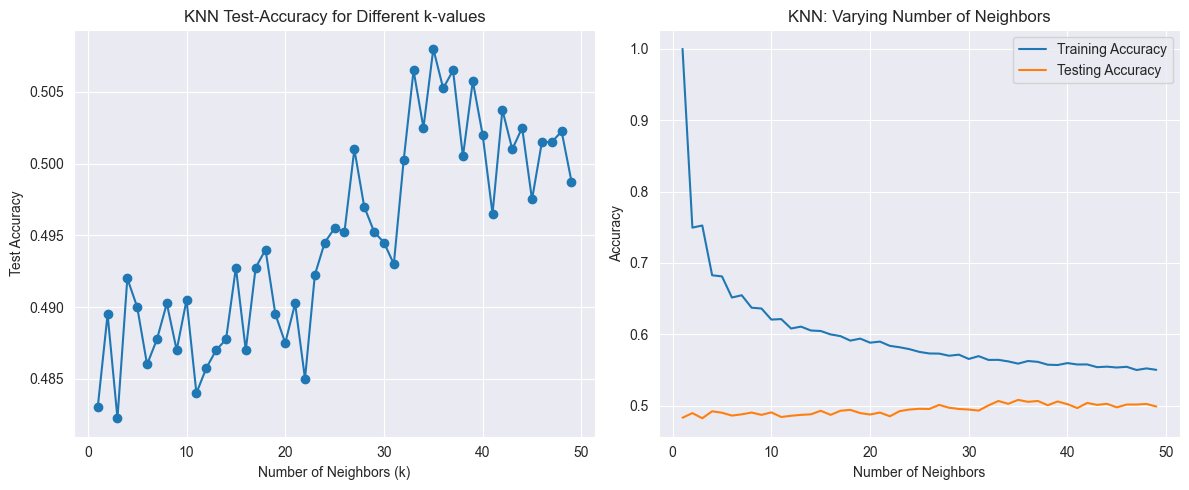

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
k_values = list(test_accuracies.keys())
accuracies = list(test_accuracies.values())
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.title('KNN Test-Accuracy for Different k-values')

plt.subplot(1, 2, 2)
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.tight_layout()  # Prevents overlapping labels
plt.show()


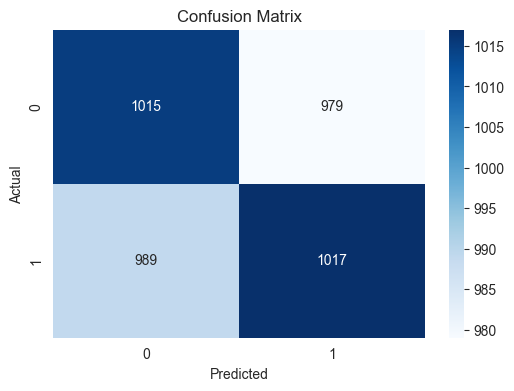

              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1994
           1       0.51      0.51      0.51      2006

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000



In [6]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Train best KNN model
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_best))

**Answer to Question:**
No, the model is pretty bad and doesn't help at all. An accuracy of just above 0.5 is very underwhelming, we could just guess and would average an accuracy of 0.5. Therefore, no, I would not use a model like this for a decision which could be life-threatening if wrong.


## Task 2
The goal of this exercise is to predict **Life Expectancy** (`Life expectancy`) based on various health, economic, and demographic factors using **Linear Regression**. The model should be optimized using **Ridge and Lasso Regression**.

1. **Preprocessing**
- Remove irrelevant columns (`Country`, `Year`).
- Encode categorical variables (`Status`).
- Handle missing values appropriately.
- Standardize numerical features (e.g., `GDP`, `Schooling`, `Alcohol`) using `StandardScaler`.
- Split the dataset into **training (80%)** and **testing (20%)** sets.

2. **Model Implementation**
- Train a **basic Linear Regression** model and evaluate its performance.
- Implement **Ridge Regression** and **Lasso Regression**, tuning the `alpha` hyperparameter using **cross-validation**.

3. **Model Evaluation**:
- Compute the **Root Mean Squared Error (MSE)** for all models.
- Compare Ridge and Lasso performance to determine if regularization improves results.
- Plot **actual vs. predicted life expectancy** scores for each model.


In [7]:
df = pd.read_csv("Life Expectancy Data.csv")
print(len(df))
df.dtypes

2938


Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [8]:
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


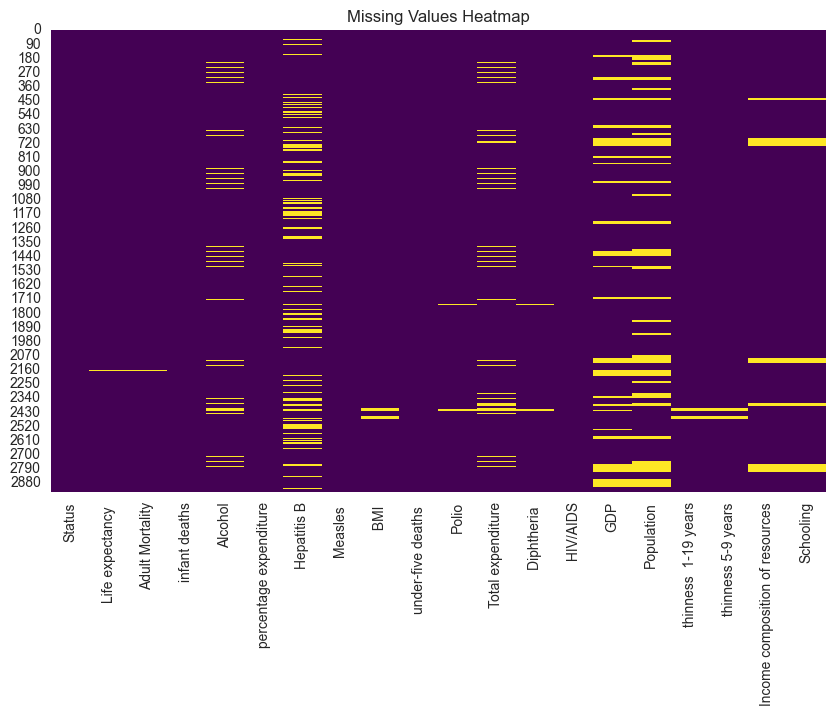

Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: float64


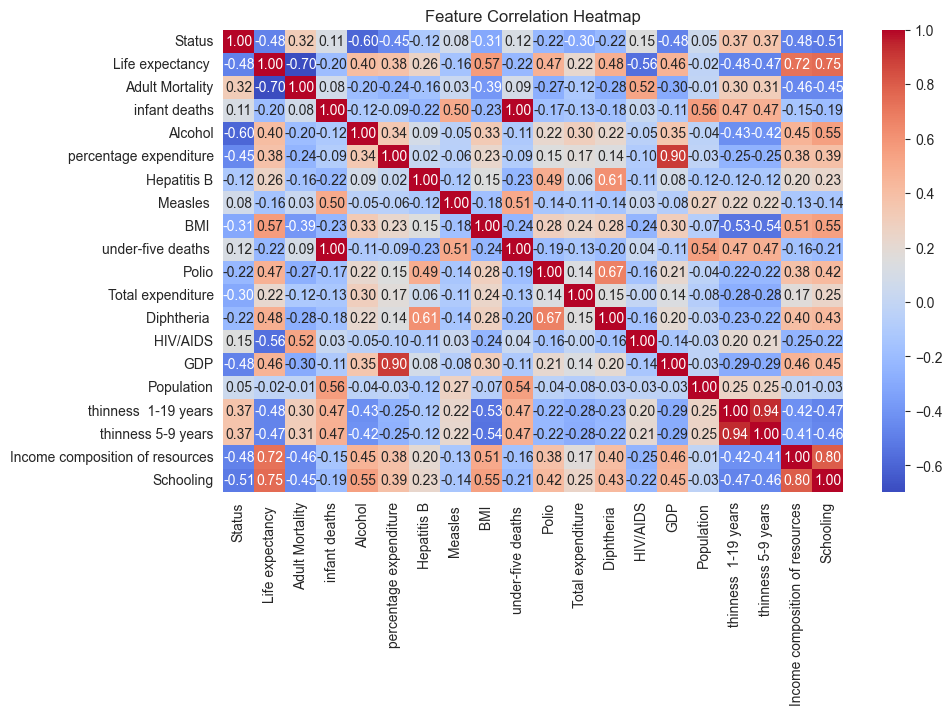

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [9]:
from sklearn.impute import KNNImputer
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing
df = df.drop(columns=['Country', 'Year'])
df['Status'] = LabelEncoder().fit_transform(df['Status'])

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
# We can assume MAR for most variables, as they seem to correlate quite a bit

imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Apply imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check if missing values are filled
print(df_imputed.isnull().sum())

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Define numeric features (exclude 'Life expectancy ' and 'Status')
numeric_features = df.drop(columns=['Life expectancy ', 'Status']).columns
scaler = StandardScaler()
df_scaled = df_imputed.copy()
df_scaled[numeric_features] = scaler.fit_transform(df_imputed[numeric_features])

# Check if missing values are filled
print(pd.DataFrame(df_scaled).isnull().sum())

# Define X (all features except target)
X = df_scaled.drop(columns=['Life expectancy '])
y = df_imputed['Life expectancy ']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for NaNs
print(X_train.isnull().sum())  # Should be all zeros


Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                  

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge
ridge = GridSearchCV(Ridge(), param_grid={'alpha': [0.1, 1, 10, 100, 1000, 10000]}, cv=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso
lasso = GridSearchCV(Lasso(), param_grid={'alpha': np.logspace(-4, 2, 10)}, cv=5)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

/Users/jack/Desktop/Wörheide_Jack/.venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.747e+03, tolerance: 1.673e+01
  model = cd_fast.enet_coordinate_descent(
/Users/jack/Desktop/Wörheide_Jack/.venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.935e+03, tolerance: 1.703e+01
  model = cd_fast.enet_coordinate_descent(
/Users/jack/Desktop/Wörheide_Jack/.venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

In [12]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Ridge Regression MSE: {mse_ridge:.4f} (Best Alpha: {ridge.best_params_})")
print(f"Lasso Regression MSE: {mse_lasso:.4f} (Best Alpha: {lasso.best_params_})")


Linear Regression MSE: 13.7935
Ridge Regression MSE: 13.7944 (Best Alpha: {'alpha': 0.1})
Lasso Regression MSE: 13.7935 (Best Alpha: {'alpha': 0.0001})


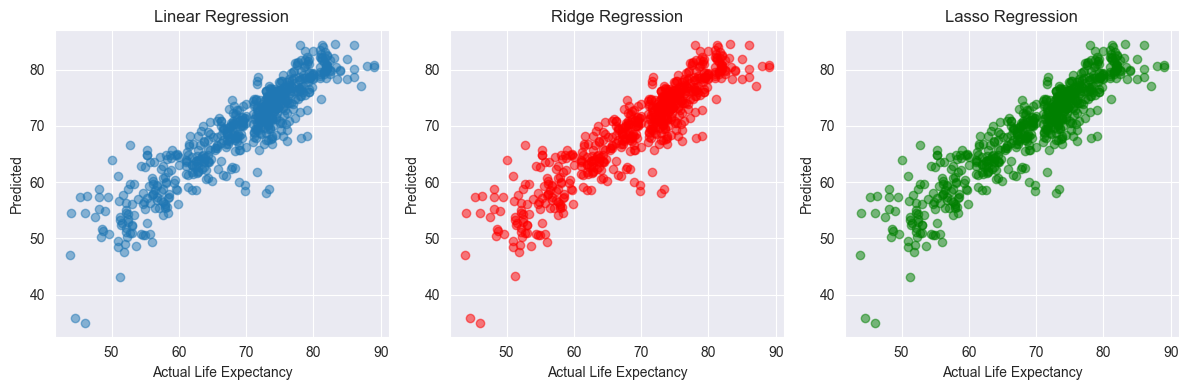

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted")
plt.title("Linear Regression")

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='r')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted")
plt.title("Ridge Regression")

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='g')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted")
plt.title("Lasso Regression")

plt.tight_layout()
plt.show()